Importación de librerias y seteo de variables constantes

In [8]:
import pandas as pd
from bson.decimal128 import Decimal128
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
path.append("../src")
from extraccion import Extraccion

URL = "mongodb://localhost:27017/"
DATABASE_NAME = "AirBnbDB"

Creación de instancia de la clase Extracción y lectura de colecciones para almacenamiento en dataframe

In [9]:
extraccion = Extraccion(URL, DATABASE_NAME)
extraccion.conectar()

2025-10-22 22:15:16 - [INFO] - extraccion - Iniciando ejecución del módulo: extraccion (log: ..\logs\log_20251022_2215_extraccion.txt)
2025-10-22 22:15:16 - [INFO] - extraccion - Conexión exitosa a la BD: AirBnbDB


Lectura y análisis de listings

In [16]:
listings:pd.DataFrame = extraccion.obtener_datos("listado")

print("Primeras filas de Listings:")
print(listings.head())

print(f"Número de filas: {listings.shape[0]} \n columnas en Listings: {listings.shape[1]}")

print("Tipos de datos en Listings:")
listings.info()

2025-10-22 22:35:19 - [INFO] - extraccion - Datos extraídos de 'listado': 26401 registros


Primeras filas de Listings:
                        _id     id                         listing_url  \
0  68bc61d98b946416d049daa4  35797  https://www.airbnb.com/rooms/35797   
1  68bc61d98b946416d049daa5  44616  https://www.airbnb.com/rooms/44616   
2  68bc61d98b946416d049daa6  56074  https://www.airbnb.com/rooms/56074   
3  68bc61d98b946416d049daa7  67703  https://www.airbnb.com/rooms/67703   
4  68bc61d98b946416d049daa8  70644  https://www.airbnb.com/rooms/70644   

        scrape_id last_scraped       source  \
0  20250625031918   2025-06-26  city scrape   
1  20250625031918   2025-07-01  city scrape   
2  20250625031918   2025-07-01  city scrape   
3  20250625031918   2025-07-01  city scrape   
4  20250625031918   2025-07-01  city scrape   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2              Great space in historical San Rafael   
3                 2 bedr

Lectura y análisis de reviews

In [11]:
reviews:pd.DataFrame = extraccion.obtener_datos("reseñas")

print("\nPrimeras filas de Reviews:")
print(reviews.head())

print(f"Número de filas: {reviews.shape[0]} \n columnas en Listings: {reviews.shape[1]}")

print("Tipos de datos en Reviews:")
reviews.info()


Primeras filas de Reviews:
                        _id  listing_id        id       date  reviewer_id  \
0  68bc62608b946416d04a41c5    10257549  59265221 2016-01-08     31043833   
1  68bc62608b946416d04a41c6    10257549  59352234 2016-01-09      7248934   
2  68bc62608b946416d04a41c7    10257549  59456981 2016-01-10     52707457   
3  68bc62608b946416d04a41c8    10257549  59661086 2016-01-13     52989229   
4  68bc62608b946416d04a41c9    10257549  59806795 2016-01-15     51159033   

  reviewer_name                                           comments  
0       Karolis  The flat is very nice newly renovated. The hos...  
1         James  Benito and his wife were great guests. Perfect...  
2        Manuel  Fue algo express. No pude volar y contacté con...  
3         Annie  This was a very comfortable and conveniently l...  
4        Svenja  Nice place, really close to te airport - Nice ...  
Número de filas: 1388226 
 columnas en Listings: 7
Tipos de datos en Reviews:
<class 'pandas.co

Lectura y análisis de calendar

In [12]:
calendar:pd.DataFrame = extraccion.obtener_datos("calendario")


print("\nPrimeras filas de Calendar:")
print(calendar.head())

print(f"Número de filas: {calendar.shape[0]} \n columnas en Listings: {calendar.shape[1]}")

print("Tipos de datos en Calendar:")
calendar.info()


Primeras filas de Calendar:
                        _id  listing_id       date  available  minimum_nights  \
0  68bc5f0e8b946416d0b6d095       35797 2025-06-26      False               1   
1  68bc5f0e8b946416d0b6d096       35797 2025-06-27       True               1   
2  68bc5f0e8b946416d0b6d097       35797 2025-06-28       True               1   
3  68bc5f0e8b946416d0b6d098       35797 2025-06-29       True               1   
4  68bc5f0e8b946416d0b6d099       35797 2025-06-30       True               1   

   maximum_nights  
0               7  
1               7  
2               7  
3               7  
4               7  
Número de filas: 9636365 
 columnas en Listings: 6
Tipos de datos en Calendar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636365 entries, 0 to 9636364
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   _id             object        
 1   listing_id      int64         
 2   date            datetime

Entendimiento general de los datos

                                Análisis de nulos para cada dataframe

Nulos en listings

Valores nulos de listings:
_id                               0
id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
                               ... 
review_scores_checkin          3375
review_scores_communication    3375
review_scores_location         3375
review_scores_value            3375
reviews_per_month              3373
Length: 77, dtype: int64

Análisis de valores nulos en Listings:
_id                               0
id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
                               ... 
review_scores_checkin          3375
review_scores_communication    3375
review_scores_location         3375
review_scores_value            3375
reviews_per_month              3373
Length: 77, dtype: int64


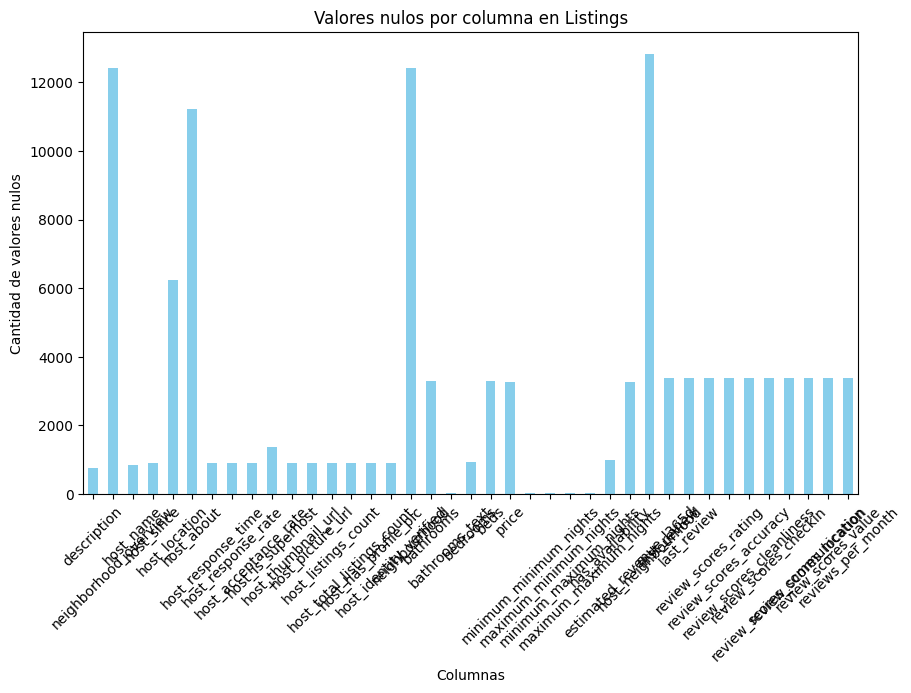

In [6]:
print("Valores nulos de listings:")
print(listings.isnull().sum())

print("\nAnálisis de valores nulos en Listings:")
valores_nulos_listings = listings.isnull().sum()
print(valores_nulos_listings)

plt.figure(figsize=(10, 6))
valores_nulos_listings[valores_nulos_listings > 0].plot(kind='bar', color='skyblue')
plt.title("Valores nulos por columna en Listings")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores nulos")
plt.xticks(rotation=45)
plt.show()

Nulos en Reviews


Análisis de valores nulos en Reviews:
_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    8
comments         0
dtype: int64


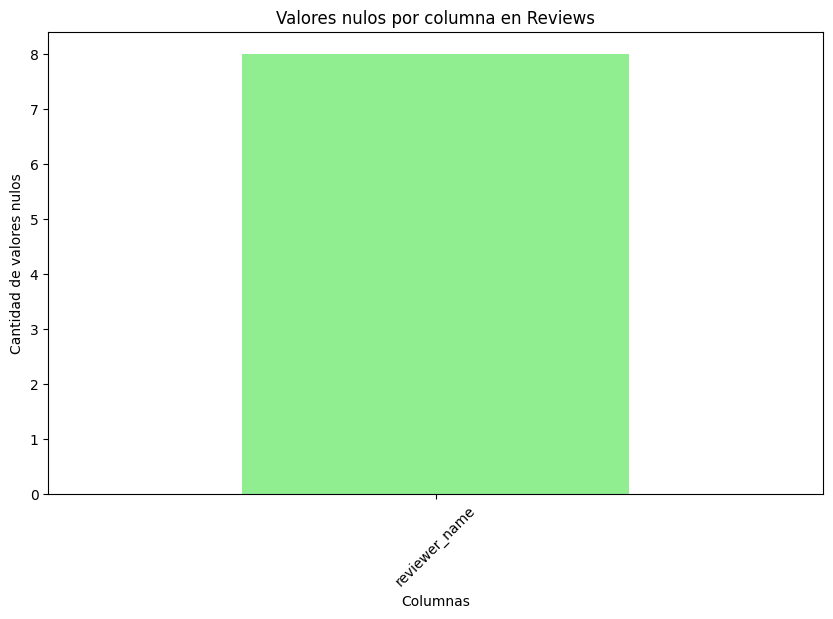

In [7]:
print("\nAnálisis de valores nulos en Reviews:")
valores_nulos_reviews = reviews.isnull().sum()
print(valores_nulos_reviews)

plt.figure(figsize=(10, 6))
valores_nulos_reviews[valores_nulos_reviews > 0].plot(kind='bar', color='lightgreen')
plt.title("Valores nulos por columna en Reviews")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores nulos")
plt.xticks(rotation=45)
plt.show()

Nulos en Calendar

In [18]:
print("\nAnálisis de valores nulos en Calendar:")
valores_nulos_calendar = calendar.isnull().sum()
print(valores_nulos_calendar)
if valores_nulos_calendar.sum():
    plt.figure(figsize=(10, 6))
    valores_nulos_calendar[valores_nulos_calendar > 0].plot(kind='bar', color='salmon')
    plt.title("Valores nulos por columna en Calendar")
    plt.xlabel("Columnas")
    plt.ylabel("Cantidad de valores nulos")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No existen valores nulos dentro del dataframe")


Análisis de valores nulos en Calendar:
_id               0
listing_id        0
date              0
available         0
minimum_nights    0
maximum_nights    0
dtype: int64
No existen valores nulos dentro del dataframe


Análisis duplicados listings

In [9]:
listingsDuplicate = listings.copy()

#Se realizan las conversiones necesarias para evitar errores al buscar duplicados

for col in listingsDuplicate.columns:
    if listingsDuplicate[col].apply(lambda x: isinstance(x, list)).any():
        listingsDuplicate[col] = listingsDuplicate[col].apply(lambda x: str(x) if isinstance(x, list) else x)

for col in listingsDuplicate.columns:
    if listingsDuplicate[col].apply(lambda x: isinstance(x, Decimal128)).any():
        listingsDuplicate[col] = listingsDuplicate[col].apply(lambda x: float(x.to_decimal()) if isinstance(x, Decimal128) else x)

print(listingsDuplicate.duplicated().sum())

#Para esta colección no eliminamos los duplicados

0


Análisis duplicados reviews

In [13]:
reviewsDuplicate = reviews.copy()

for col in reviewsDuplicate.columns:
    if reviewsDuplicate[col].apply(lambda x: isinstance(x, list)).any():
        reviewsDuplicate[col] = reviewsDuplicate[col].apply(lambda x: str(x) if isinstance(x, list) else x)
    if reviewsDuplicate[col].apply(lambda x: isinstance(x, Decimal128)).any():
        reviewsDuplicate[col] = reviewsDuplicate[col].apply(lambda x: float(x.to_decimal()) if isinstance(x, Decimal128) else x)

duplicados_reviews = reviewsDuplicate.duplicated().sum()
print(f"Duplicados en Reviews: {duplicados_reviews}")

if duplicados_reviews > 0:
    reviewsDuplicate.drop_duplicates(inplace=True)
    print("Duplicados eliminados en Reviews.")

#En esta eliminamos duplicados para no afectar reseñas para los diferentes sitios

Duplicados en Reviews: 0


Análisis de duplicados para calendar

In [14]:
calendarDuplicate = calendar.copy()

for col in calendarDuplicate.columns:
    if calendarDuplicate[col].apply(lambda x: isinstance(x, list)).any():
        calendarDuplicate[col] = calendarDuplicate[col].apply(lambda x: str(x) if isinstance(x, list) else x)
    if calendarDuplicate[col].apply(lambda x: isinstance(x, Decimal128)).any():
        calendarDuplicate[col] = calendarDuplicate[col].apply(lambda x: float(x.to_decimal()) if isinstance(x, Decimal128) else x)

duplicados_calendar = calendarDuplicate.duplicated().sum()
print(f"Duplicados en Calendar: {duplicados_calendar}")

if duplicados_calendar > 0:
    calendarDuplicate.drop_duplicates(inplace=True)
    print("Duplicados eliminados en Calendar.")

#En esta si eliminamos registros duplicados porque estarían alterando análisis 


Análisis de duplicados en Calendar:
Duplicados en Calendar: 0


Validación de valores atípicos para campos price, minimum_nights, availability_365

In [36]:
listings['price'] = (listings['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float))

for columna in ["price", "minimum_nights", "availability_365"]:
    if columna in listings.columns:
        listings[columna] = pd.to_numeric(listings[columna], errors='coerce')
        if listings[columna].isnull().sum() > 0:
            print(listings[columna].isnull().sum())
            print(f"Advertencia: La columna '{columna}' contiene valores no numéricos. Se convertirán a NaN.")
            print(listings[listings[columna].isnull()])

3274
Advertencia: La columna 'price' contiene valores no numéricos. Se convertirán a NaN.
                            _id                   id  \
5      68bc61d98b946416d049daa9               131610   
9      68bc61d98b946416d049daad               187030   
14     68bc61d98b946416d049dab2              1378164   
19     68bc61d98b946416d049dab7               187745   
20     68bc61d98b946416d049dab8               194937   
...                         ...                  ...   
25556  68bc61e18b946416d04a3e78  1421736226099612779   
25567  68bc61e18b946416d04a3e83  1419678752493034294   
25631  68bc61e18b946416d04a3ec3  1424075947431136129   
25672  68bc61e18b946416d04a3eec  1424926351497713949   
25774  68bc61e18b946416d04a3f52  1426844156042550885   

                                            listing_url       scrape_id  \
5                   https://www.airbnb.com/rooms/131610  20250625031918   
9                   https://www.airbnb.com/rooms/187030  20250625031918   
14          

### Hallazgos dentro de colecciones AirBnb

Hemos encontrado lo siguiente: <br>
    <br>1. La cantidad de nulos dentro de la colección de listing corresponde a campos que podrían servir para realizar análisis sobre las reseñas que reciben cada uno de los host u hospedajes, pero teniendo en cuenta que contamos con una colección de reseñas los análisis se pueden realizar tomando la información de esa colección.
    <br>2. Para la colección de reseñas contamos con muy pocos nulos correspondientes al nombre de la persona, no tomamos en cuenta estos nulos, ya que, al ser nombres que muchas veces son sólo primer nombre, es complejo realizar agrupación por el mismo. Dándole importancia a campos que si nos generan valor y no poseen nulos.
    <br>3. Para la colección de calendar no encontramos nulos, debido que, esta colección almacena las fechas donde un hospedaje estuvo reservado o disponible, contando así con fechas diferentes para cada hospedaje.
    <br>4. Para las diferentes colecciones encontramos que no existen duplicados en las mismas, la data con la que se cuenta se encuentra procesada y lista para ser analizada.
    <br>5. Luego de realizar el análisis a las columnas "price", "minimum_nights" y "availability_365", se detectó que 3274 registros no contienen la columna precio. Las demás columnas poseen la información en el formato deseado<br>